In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
le = LabelEncoder()
model = LogisticRegression()

In [118]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [119]:
le.fit( data['income'] )
y = pd.Series( data = le.transform( data['income'] ) )

In [120]:
data = data.drop(columns=['fnlwgt'])

In [121]:
X = pd.get_dummies(data, columns = ['workclass','education','marital-status','occupation',\
                                       'relationship','race', 'gender','native-country' ])
X = X.drop(columns=['income'])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_test,y_test)
model.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.858941549800389

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [124]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [125]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, \
                  scoring = 'accuracy', return_train_score = False )

In [126]:
gs.fit( X, y )

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [127]:
gs.best_params_

{'max_depth': 10}

In [128]:
max_depth = 10
cross_val_score( DecisionTreeClassifier( max_depth = max_depth ), X, y, cv = 5, scoring = 'accuracy' )

array([0.85853209, 0.8579179 , 0.85913186, 0.86179361, 0.86117936])

In [129]:
max_depth = np.linspace(1,10,10)

stds = []
means = []
for i in max_depth:
   a = np.mean(cross_val_score( DecisionTreeClassifier( max_depth = i ), X, y, cv = 5, scoring = 'accuracy' ))
   b = np.std(cross_val_score( DecisionTreeClassifier( max_depth = i ), X, y, cv = 5, scoring = 'accuracy' ))
   means.append(a)
   stds.append(b)

for i in zip(means, stds):
   print(i)

(0.7607182362198229, 3.815022657841085e-05)
(0.8285492396890698, 0.0017131063419730471)
(0.8431882819921513, 0.0019447484696599726)
(0.8432497259168361, 0.002050109187376169)
(0.850354262497266, 0.0015621720972851761)
(0.8552680347644008, 0.001721969425947247)
(0.8555342142224116, 0.0011733534341968103)
(0.8569059798126233, 0.0018621072691036929)
(0.8582982476702407, 0.002337955015006541)
(0.8596904945686807, 0.0014802535749952389)


In [130]:
predictions = model.predict_proba( X_test )

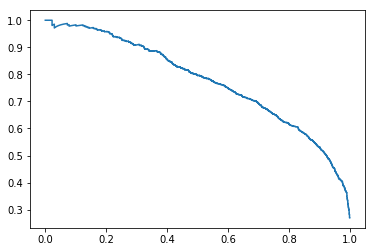

In [131]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )
plt.plot( re, pr )

In [95]:
roc_auc_score( y_test, predictions[:, 1] )

0.9122811995859148

In [101]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
auc( fpr, tpr )

0.9122811995859148